<a href="https://colab.research.google.com/github/Thierno-dev/MachineLearningApprentissage/blob/main/PriseEnMainPyhton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Manipuler les données

Manipulation de donnee tensorflow

In [1]:
import numpy as np
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

x= tf.range(25,dtype=tf.float32)
print(x)
tf.size(x)

TensorFlow version: 2.15.0
tf.Tensor(
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.], shape=(25,), dtype=float32)


<tf.Tensor: shape=(), dtype=int32, numpy=25>

Redimensionner les donnee du tableau en un tableau 2D

In [2]:
tf.reshape(x,(5,5))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float32)>

Initialisation des variables

In [3]:
zeros = tf.zeros((2,3,5))

#print(zeros)

ones = tf.ones((3,4,6))

#print(ones)

rand_tab = tf.random.normal((2,5))

#print(rand_tab)

tab_const= tf.constant([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

#print(tab_const)

rand_tab[-1]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 0.6875145 ,  0.34918928, -0.74930924,  0.14841868, -1.8437177 ],
      dtype=float32)>

Operation sur les données

In [4]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 11]])
tf.concat([X, Y], axis=1),tf.concat([Y, X], axis=0) # Utilisation de la fonction concatener mettre les donne sur l'axe x=0 suivant les ligne axe x=1 suivant les colonnes

(<tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2., 11.]], dtype=float32)>,
 <tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2., 11.],
        [ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)>)

Operation *data*

In [5]:
X == Y

<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False,  True]])>

Operation sommes

In [6]:
tf.reduce_sum(X,axis=1)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 6., 22., 38.], dtype=float32)>

In [7]:
A = X.numpy()
B = tf.constant(A)
type(A), type(B)

(numpy.ndarray, tensorflow.python.framework.ops.EagerTensor)

Manipulation de pandas

In [8]:
import pandas as pd
dates = pd.date_range("20130101", periods=6)

print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.describe()
#print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.375085,0.302522,-0.485607,-0.391203
std,1.028446,0.753710,1.067881,1.416997
min,-1.221247,-0.972297,-1.648530,-2.130347
25%,-1.145696,0.072949,-1.395349,-0.957107
50%,-0.740523,0.362683,-0.433993,-0.521074
75%,0.079799,0.831747,0.088878,-0.299359
max,1.379294,1.097588,1.055505,2.153183


In [9]:
dt_tableTranslate = df.T

decoupage = dt_tableTranslate.loc["A":"B",["20130101","20130104"]]#decoupage de table

#print(decoupage)

#Retrouver les données en fonctions d'un seuil

new_data = dt_tableTranslate[dt_tableTranslate["20130101"]<0]#filtrer des données en fonctions d'un critere

#filtrage suivant des nouvelle donnees

new_data1 = dt_tableTranslate.copy().T

new_data1["E"] = ["one", "one", "two", "three", "four", "three"]

newdata2 = new_data1[new_data1["E"].isin(["two","three"])]

df1 = new_data1.reindex(index=dates[0:4], columns=list(df.columns) + ["F"])

#df1.dropna(how="any") , df1.fillna(value=5), pd.isna(df1)

#print(df1)
df1.mean(axis=1)


2013-01-01   -0.158162
2013-01-02   -0.167607
2013-01-03   -0.169853
2013-01-04   -0.359190
Freq: D, dtype: float64

Fonction de transformation

In [10]:
dt_aggr = dt_tableTranslate.agg(lambda x: np.mean(x)*10)

dt_aggr


2013-01-01   -1.581625
2013-01-02   -1.676067
2013-01-03   -1.698527
2013-01-04   -3.591901
2013-01-05   -9.508621
2013-01-06    3.816128
Freq: D, dtype: float64

Transformation des transformations

In [11]:
dt_transform= dt_tableTranslate.transform(lambda x : x*6)

dt_transform

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,8.275765,-6.323842,-2.562432,-7.057621,-7.327483,1.492538
B,2.180858,2.171334,-0.140183,5.927024,6.585529,-5.833782
C,-9.891181,6.333028,0.390511,-5.598423,-9.296652,0.580851
D,-4.361341,-6.203079,-1.764360,-1.891541,-12.782084,12.919099


Structure de données

In [12]:
s = pd.Series([1,3,5,np.nan,6,8])#creer des tableau à une dimension
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creer 2D avec DataFrames

In [13]:
dates1=pd.date_range("20220106",periods=10)#Creation de donnee pour la dates

dates1

dfs1 = pd.DataFrame(np.random.randn(10,4),index=dates1,columns=list("ABCD"))#Creation  d'une dataframe pour les données 10 ligne et 4 colonnes

dfdic = pd.DataFrame(
    {
        "A":1.0,
        "B":pd.Timestamp("20230102"),
        "C":pd.Series(1,index=list(range(4))),
        "D":np.array([6]*4),
        "E":pd.Categorical(["test","train","test","train"]),
        "F":"Fete"
    }
)#Creation d'un dictionnaire

dfs1,dates1,dfdic,dfdic.dtypes



(                   A         B         C         D
 2022-01-06 -0.161995 -0.786161 -0.393049  1.362491
 2022-01-07  1.026897 -0.318268 -0.535804 -0.633920
 2022-01-08  0.191218  0.048296  1.042269  0.491695
 2022-01-09  1.526561  0.739209 -0.096316  0.272088
 2022-01-10 -0.146070  1.820828 -0.704989 -1.321696
 2022-01-11 -1.473875  0.068947 -0.056758 -0.838097
 2022-01-12  1.057842  0.588562 -0.510017 -0.299248
 2022-01-13 -0.353020  1.509077  0.354720  0.457312
 2022-01-14 -0.188308  1.542474  1.328633 -0.080502
 2022-01-15 -0.228408  0.566580 -0.432614  0.411607,
 DatetimeIndex(['2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
                '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
                '2022-01-14', '2022-01-15'],
               dtype='datetime64[ns]', freq='D'),
      A          B  C  D      E     F
 0  1.0 2023-01-02  1  6   test  Fete
 1  1.0 2023-01-02  1  6  train  Fete
 2  1.0 2023-01-02  1  6   test  Fete
 3  1.0 2023-01-02  1  6  train  Fet

Affichage des donnees

In [14]:
dfdic.head(2),dfdic.tail(2),dfdic.index,dfdic.columns,df.to_numpy,dfdic.describe()

(     A          B  C  D      E     F
 0  1.0 2023-01-02  1  6   test  Fete
 1  1.0 2023-01-02  1  6  train  Fete,
      A          B  C  D      E     F
 2  1.0 2023-01-02  1  6   test  Fete
 3  1.0 2023-01-02  1  6  train  Fete,
 Int64Index([0, 1, 2, 3], dtype='int64'),
 Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object'),
 <bound method DataFrame.to_numpy of                    A         B         C         D
 2013-01-01  1.379294  0.363476 -1.648530 -0.726890
 2013-01-02 -1.053974  0.361889  1.055505 -1.033847
 2013-01-03 -0.427072 -0.023364  0.065085 -0.294060
 2013-01-04 -1.176270  0.987837 -0.933071 -0.315257
 2013-01-05 -1.221247  1.097588 -1.549442 -2.130347
 2013-01-06  0.248756 -0.972297  0.096809  2.153183>,
          A    C    D
 count  4.0  4.0  4.0
 mean   1.0  1.0  6.0
 std    0.0  0.0  0.0
 min    1.0  1.0  6.0
 25%    1.0  1.0  6.0
 50%    1.0  1.0  6.0
 75%    1.0  1.0  6.0
 max    1.0  1.0  6.0)

Recuperer les données d'un tableau

In [15]:
dfdic["A"],dfdic[0:3]

(0    1.0
 1    1.0
 2    1.0
 3    1.0
 Name: A, dtype: float64,
      A          B  C  D      E     F
 0  1.0 2023-01-02  1  6   test  Fete
 1  1.0 2023-01-02  1  6  train  Fete
 2  1.0 2023-01-02  1  6   test  Fete)

Selection par etiquetes

In [16]:
dfdic.loc[0]#Selection d'une ligne a partir d'une etiquette

A                    1.0
B    2023-01-02 00:00:00
C                      1
D                      6
E                   test
F                   Fete
Name: 0, dtype: object

Selection de ligne et un certain  nombre de colonne

In [17]:
dfdic.loc[1:3,["A","B"]]

,A,B
1,1.0,2023-01-02
2,1.0,2023-01-02
3,1.0,2023-01-02


Mise en place des merges(join)

In [18]:
left = pd.DataFrame({"key":["foo","bar"],"lval":[1,2]})
right = pd.DataFrame({"key":["foo","bar"],"rval":[4,5]})

allin = pd.merge(left,right,on="key")

allin

,key,lval,rval
0,foo,1,4
1,bar,2,5


Faire un group by

In [19]:
dfgrou = pd.DataFrame(
    {
        "A":["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B":["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

dfgroubyB = dfgrou.groupby("B")[["A"]].value_counts()

dfgroubyAB = dfgrou.groupby(["A","B"]).sum()

dfgroubyAB

C         D
A   B                        
bar one    1.557066  2.588836
    three  0.596628  1.299932
    two   -0.222231 -1.388303
foo one   -0.225273  0.049279
    three  0.692253  1.153243
    two   -2.529121 -1.570363

Remodeler les valeurs(Reshap)

In [20]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df


A         B
first second                    
bar   one    -1.891428  0.747672
      two     2.126082 -0.283747
baz   one    -0.419061  0.655089
      two    -0.724587  0.794253
foo   one    -0.786569  0.148488
      two    -0.639411 -0.406475
qux   one     1.526682  0.237787
      two     1.141973  1.163985

Compression au niveau de la colonnes, tableau croise dynamique(pivot tables)

In [21]:
df = pd.DataFrame({
     "A": ["one", "one", "two", "three"] * 4,
      "B": ["A", "B", "C","D"] * 4,
      "C": ["foo", "foo", "foo", "bar", "bar", "bar","bar","loi"] * 2,
      "D": np.random.randn(16),
      "E": np.random.randn(16),
})

dt_dynamique = pd.pivot_table(df,values="D",index=["A","B"],columns=["C"])#Ceci permet d'avoir le tableau croise dynamique avec les valeur de D, puis les index A,B sur les valeur de la colonne C

df,dt_dynamique




(        A  B    C         D         E
 0     one  A  foo  0.411300  0.521573
 1     one  B  foo  1.089557 -0.109048
 2     two  C  foo -0.437315 -2.611092
 3   three  D  bar  0.855261 -0.505437
 4     one  A  bar -0.326123  1.395436
 5     one  B  bar -0.213710 -0.264146
 6     two  C  bar -2.301628 -1.350836
 7   three  D  loi  0.231025 -1.233294
 8     one  A  foo -0.878034 -1.716556
 9     one  B  foo  0.270143  0.111455
 10    two  C  foo -1.089597 -0.686757
 11  three  D  bar -1.624344 -1.175899
 12    one  A  bar -1.262802  0.121918
 13    one  B  bar  0.827947 -0.479804
 14    two  C  bar  0.269163 -0.555631
 15  three  D  loi  0.584637  1.009345,
 C             bar       foo       loi
 A     B                              
 one   A -0.794463 -0.233367       NaN
       B  0.307118  0.679850       NaN
 three D -0.384541       NaN  0.407831
 two   C -1.016233 -0.763456       NaN)

gerer des donnees chrnologique come times series pour effectuer des operations de reechantillonnage

In [22]:
rng = pd.date_range("1/1/2022",periods=50,freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts,ts.resample("5Min").sum()#ceci permet de calculer le total de valeur en 5min ecouler

(2022-01-01 00:00:00    358
 2022-01-01 00:00:01    105
 2022-01-01 00:00:02     55
 2022-01-01 00:00:03    370
 2022-01-01 00:00:04    379
 2022-01-01 00:00:05    413
 2022-01-01 00:00:06    268
 2022-01-01 00:00:07     56
 2022-01-01 00:00:08    474
 2022-01-01 00:00:09    110
 2022-01-01 00:00:10    491
 2022-01-01 00:00:11     94
 2022-01-01 00:00:12    298
 2022-01-01 00:00:13     36
 2022-01-01 00:00:14    164
 2022-01-01 00:00:15    305
 2022-01-01 00:00:16    118
 2022-01-01 00:00:17    204
 2022-01-01 00:00:18    142
 2022-01-01 00:00:19    182
 2022-01-01 00:00:20    296
 2022-01-01 00:00:21    250
 2022-01-01 00:00:22    445
 2022-01-01 00:00:23    111
 2022-01-01 00:00:24    457
 2022-01-01 00:00:25    236
 2022-01-01 00:00:26    106
 2022-01-01 00:00:27    291
 2022-01-01 00:00:28    352
 2022-01-01 00:00:29    204
 2022-01-01 00:00:30    298
 2022-01-01 00:00:31     86
 2022-01-01 00:00:32    461
 2022-01-01 00:00:33    257
 2022-01-01 00:00:34    330
 2022-01-01 00:00:35

Localiser une time seris sur un fuseau horaire

In [23]:
rng = pd.date_range("3/6/2022 00:00",periods=5,freq="D")

ts = pd.Series(np.random.randn(len(rng)),rng)
ts_utc= ts.tz_localize("UTC")

ts_utc

2022-03-06 00:00:00+00:00    0.294665
2022-03-07 00:00:00+00:00   -0.811311
2022-03-08 00:00:00+00:00    1.963260
2022-03-09 00:00:00+00:00   -1.813387
2022-03-10 00:00:00+00:00   -2.102534
Freq: D, dtype: float64

Faire des categroies dans un fichier pandas

In [24]:
df =pd.DataFrame({
    "id":[1,2,3,4,5,6],
    "raw_grade":["a", "b", "b", "a", "a", "e"]
})

df["grade"]=df["raw_grade"].astype("category")

df,df["grade"]

new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df,df["grade"],df.sort_values(by="grade"),df.groupby("grade", observed=False).size()

(   id raw_grade      grade
 0   1         a  very good
 1   2         b       good
 2   3         b       good
 3   4         a  very good
 4   5         a  very good
 5   6         e   very bad,
 0    very good
 1         good
 2         good
 3    very good
 4    very good
 5     very bad
 Name: grade, dtype: category
 Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good'],
    id raw_grade      grade
 5   6         e   very bad
 1   2         b       good
 2   3         b       good
 0   1         a  very good
 3   4         a  very good
 4   5         a  very good,
 grade
 very bad     1
 bad          0
 medium       0
 good         2
 very good    3
 dtype: int64)

Faire des traçage

In [25]:
import matplotlib.pyplot as plt

plt.close("all")

Tracer les fenetre

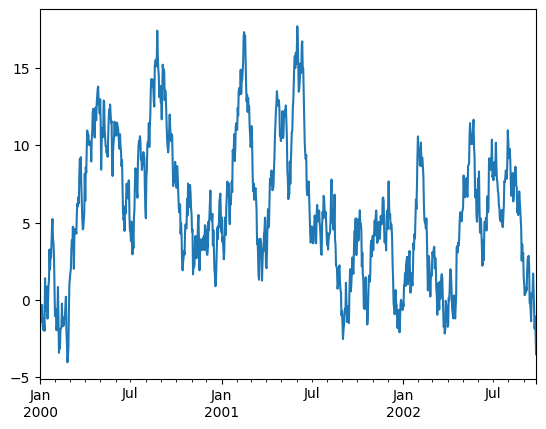

In [26]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()



ts.plot();

tracer des colonnes

In [28]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=["Achat","Lieu","Nom","Prenom"])

df = df.cumsum()

df

#plt.figure();

#df.plot();

#plt.legend(loc='best');

,Achat,Lieu,Nom,Prenom
2000-01-01,-0.254224,-1.014113,0.903904,-0.481699
2000-01-02,-1.368569,-1.394685,0.101969,-1.437755
2000-01-03,-0.733253,-1.619955,0.591245,-1.731371
2000-01-04,-0.131298,-0.997176,1.450248,-1.117574
2000-01-05,0.847051,-0.481680,1.471561,-1.402207
...,...,...,...,...
2002-09-22,14.299983,-77.399497,-8.785051,9.394716
2002-09-23,13.413469,-78.165189,-9.620478,7.244012
2002-09-24,13.978308,-77.633499,-9.476693,7.645359
2002-09-25,14.947825,-78.718183,-10.550126,6.811736


# Nouvelle section

# Nouvelle section

Write data in file

In [37]:
#Data in csv

df = pd.DataFrame(np.random.randint(0,5,(10,5)),index=pd.date_range("1/1/2000", periods=10),
                  columns=["A","B","C","D","E"])

df.to_csv("foo.csv")

df1 = pd.read_csv("foo.csv")

df1


,Unnamed: 0,A,B,C,D,E
0,2000-01-01,3,2,2,4,3
1,2000-01-02,4,0,2,0,0
2,2000-01-03,0,0,3,4,3
3,2000-01-04,0,1,0,1,4
4,2000-01-05,2,3,4,1,0
5,2000-01-06,0,1,1,2,2
6,2000-01-07,3,3,3,0,0
7,2000-01-08,0,2,4,1,2
8,2000-01-09,2,4,2,3,2
9,2000-01-10,3,0,0,4,0
